In [1]:
#Importing libraries

#for data manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in booking data
booking = pd.read_csv("booking.csv")
print(booking.head(3))

          hotel  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel        342               2015               July   
1  Resort Hotel        737               2015               July   
2  Resort Hotel          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal country  ...  \
0                        0                     0   BB     PRT  ...   
1                        0                     0   BB     PRT  ...   
2                        0                     1   BB     GBR  ...   

  booking_changes deposit_type  agent  company  days_in_waiting_list  \
0               3   No Deposit    NaN      NaN                     0   
1               4   No Deposit    NaN      NaN                     0 

In [3]:
#read in client information data
client = pd.read_csv("client_info.csv")
print(client.head(3))

  reservation_status_date            name  babies  children  adults  \
0                7/1/2015   Ernest Barnes       0       0.0       2   
1                7/1/2015    Andrea Baker       0       0.0       2   
2                7/2/2015  Rebecca Parker       0       0.0       1   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  


In [4]:
# merged two dataset into a new dataset.
df = pd.concat([booking, client], axis = 1)
print(df.head(3))

          hotel  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel        342               2015               July   
1  Resort Hotel        737               2015               July   
2  Resort Hotel          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal country  ...  \
0                        0                     0   BB     PRT  ...   
1                        0                     0   BB     PRT  ...   
2                        0                     1   BB     GBR  ...   

  reservation_status Unnamed: 26  reservation_status_date            name  \
0          Check-Out         NaN                 7/1/2015   Ernest Barnes   
1          Check-Out         NaN                 7/1/2015  

# data analysis and data cleaning

In [5]:
#check size of dataset
print(df.shape)

(119390, 35)


there are 35 columns and 119390 rows in this dataset.

In [6]:
#dataset information
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,Unnamed: 26,babies,children,adults
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,0.0,119390.000000,119386.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,NaN,0.007949,0.103890,1.856403
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,NaN,0.097436,0.398561,0.579261
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,NaN,0.000000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,NaN,0.000000,0.000000,2.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,NaN,0.000000,0.000000,2.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,NaN,0.000000,0.000000,2.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,NaN,10.000000,10.000000,55.000000


In [7]:
# columns in dataset
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'reservation_status', 'Unnamed: 26', 'reservation_status_date', 'name',
       'babies', 'children', 'adults', 'email', 'phone-number', 'credit_card'],
      dtype='object')

In [8]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_gues

In [9]:
#remove the unnecessary columns
df.drop(["Unnamed: 26","phone-number","credit_card","agent","company","email","name"],axis=1, inplace=True)
print(df.head(3))

          hotel  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel        342               2015               July   
1  Resort Hotel        737               2015               July   
2  Resort Hotel          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal country  ...  \
0                        0                     0   BB     PRT  ...   
1                        0                     0   BB     PRT  ...   
2                        0                     1   BB     GBR  ...   

  deposit_type days_in_waiting_list  customer_type   adr  \
0   No Deposit                    0      Transient   0.0   
1   No Deposit                    0      Transient   0.0   
2   No Deposit                   

In [10]:
#changing "reservation_status_date" from object to date time
df["reservation_status_date"]= pd.to_datetime(df["reservation_status_date"])
print(df["reservation_status_date"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: reservation_status_date
Non-Null Count   Dtype         
--------------   -----         
119390 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.9 KB
None


In [11]:
#missing values
df.isnull().sum()

hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
reservation_status                  0
reservation_status_date             0
babies                              0
children    

In [12]:
#remove null values
df.dropna(inplace=True)

In [13]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,reservation_status_date,babies,children,adults
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898,118898.000000,118898.000000,118898.000000
mean,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,2016-07-30 07:37:53.336809984,0.007948,0.104207,1.858391
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,2014-10-17 00:00:00,0.000000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,2016-02-02 00:00:00,0.000000,0.000000,2.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,2016-08-08 00:00:00,0.000000,0.000000,2.000000
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,2017-02-09 00:00:00,0.000000,0.000000,2.000000
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,2017-09-14 00:00:00,10.000000,10.000000,55.000000
std,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,NaN,0.097380,0.399172,0.578576


In [14]:
#  total children 
df['children'].sum()

12390.0

In [15]:
#  total adults
df['adults'].sum()

220959

In [16]:
#  total babies
df['babies'].sum()

945

# Data Analysis and Visualizations

In [17]:
#check the new or repeated guest
value_counts = df["is_repeated_guest"].value_counts()
print(value_counts)

is_repeated_guest
0    115092
1      3806
Name: count, dtype: int64


In [18]:
#  replace 0 with "New" and 1 with "Repeated"
df["is_repeated_guest"] = df["is_repeated_guest"].replace({0: "New", 1: "Repeated"})
print(value_counts)

is_repeated_guest
0    115092
1      3806
Name: count, dtype: int64


is_repeated_guest
New         96.798937
Repeated     3.201063
Name: proportion, dtype: float64


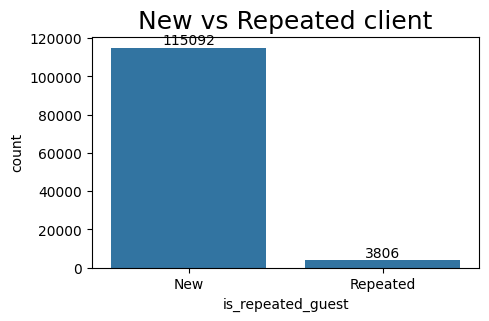

In [19]:
# calculating percentage of repeated guest
repeated_guest = df["is_repeated_guest"].value_counts(normalize = True)*100
print(repeated_guest)

#creating a countplot and label the bars in the plot using the Seaborn library
plt.figure(figsize = (5,3))

#bar title
plt.title("New vs Repeated client", size = 18)

# count plot using Seaborn with x axis label
ax=sns.countplot(data=df,x="is_repeated_guest")

#label the bar
ax.bar_label(ax.containers[0])
plt.show()

An analysis of the chart, majority of clients are new clients (approximately 96.80%), while a small proportion are repeated clients (approximately 3.20%). 

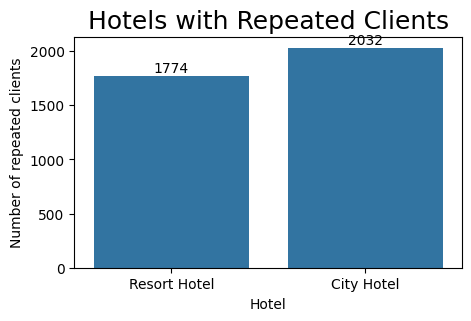

In [20]:
# which hotel has more reapeted client
plt.figure(figsize = (5,3))

# Filter the data to include only repeated clients
repeated_clients = df[df['is_repeated_guest'] == "Repeated"]

# Count the number of repeated clients for each hotel
hotel_counts = repeated_clients['hotel'].value_counts()

ax= sns.countplot(x="hotel", data = repeated_clients)

plt.title("Hotels with Repeated Clients",size = 18)
plt.xlabel("Hotel")
plt.ylabel("Number of repeated clients")


#label the bar with counts
ax.bar_label(ax.containers[0])
plt.show()

The chart above shows City hotel do better job of making guest to come back and stay with them compare to resort hotel.

{'Previous Cancellation': 10361, 'Not Canceled': 15651}


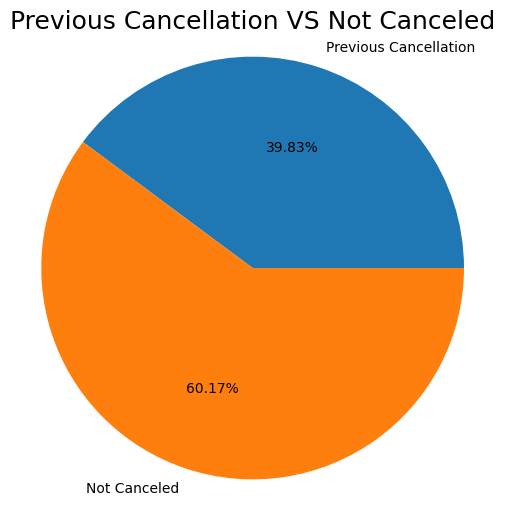

In [25]:
#previous cancellations vs previous bookings not canceled
data={
    "Previous Cancellation" : df["previous_cancellations"].sum(),
    "Not Canceled" : df["previous_bookings_not_canceled"].sum()
}
print(data)

#label for pie chart
label = data.keys() 


#create a pie chart
plt.figure(figsize=(6, 6))

#title for the pie chart
plt.title("Previous Cancellation VS Not Canceled", size=18)

plt.pie(data.values(), labels=label, autopct="%1.2f%%")# autopct display the percentage labels in chart

plt.axis('equal')  # Equal ratio ensures that the pie chart is circular

plt.show()

The pie chart shows that the majority of previous bookings (60.17%), were not canceled, while 39.83% of previous bookings were canceled.